大作业：鳄梨数据分析及价格预测

选题缘由：该问题其实非常简单，由于本人本身就是计算机相关专业的学生。所以说到和专业相关其实一瞬间有一点蒙。然后由于学习到了神经网络，所以想做一些预测。故在这里选择了基础的价格预测。

问题背景：鳄梨在美国各地区的销售情况统计。这里主要关注于鳄梨的销售结果的统计整理与可视化。以及利用不同的神经网络，实现价格的预测，并观察他们的预测效果。

需要用到的包：这里采用的是python3.8以及对应版本的pytorch。应该是无cuda的版本，在cpu上运行。
后面爬取鳄梨相关百度搜索文本，需要使用selenium、与chrome浏览器对应版本的chromediver
同时需要jieba和词云的库。在后面词云显示时，需要有字体路径。这里采用的是电脑中自带的宋体。

In [1]:
#!/usr/bin/env python
#-*-coding:utf-8-*-
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl

import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch

from wordcloud import WordCloud
import wordcloud

%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif']=['SimHei']     #解决中文显示问题
filepath="C:\\Users\\63093\\Desktop\\py\\project林端儿518021910485\\avocado.csv"#数据集由kaggle下载
data=pd.read_csv(filepath,header=0,encoding="gbk")

data.head(n=5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


根据需要分析的数据，筛选出需要的数据所在的列。后进行作图分析。

按照日期分类，统计所有地区每天的鳄梨销售情况。

Text(0, 0.5, 'y')

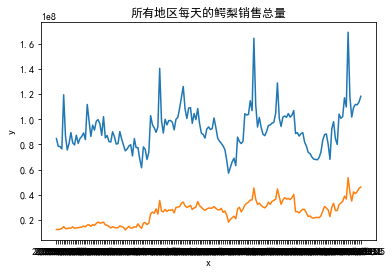

In [3]:
by_date_sum = data.groupby('Date').agg('sum') 

x = by_date_sum["Total Volume"].index
y1, y2 = by_date_sum["Total Volume"], by_date_sum["Total Bags"]

plt.plot(x, y1)
plt.plot(x, y2)
 
plt.title('所有地区每天的鳄梨销售总量')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

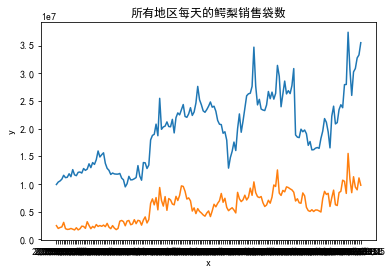

In [4]:
x = by_date_sum["Small Bags"].index
y1, y2 = by_date_sum["Small Bags"], by_date_sum["Large Bags"]

plt.plot(x, y1)
plt.plot(x, y2)
 
plt.title('所有地区每天的鳄梨销售袋数')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

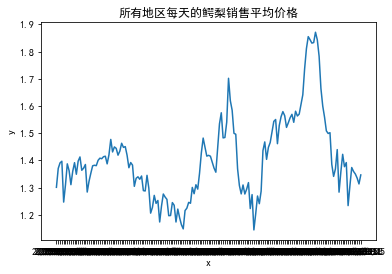

In [5]:
by_date_mean = data.groupby('Date').agg('mean') 

x = by_date_mean["AveragePrice"].index
y = by_date_mean["AveragePrice"]

plt.plot(x, y)

plt.title('所有地区每天的鳄梨销售平均价格')
plt.xlabel('x')
plt.ylabel('y')

我们注意到，其实每个地区也可能存在差异，故我们还可以按照地区进行划分,进行分析。

将地区的销量作为“频率”用词云展示
也可以清晰看到各地的购买量
其中明显加利福尼亚州与greatlakes地区购买更多。

Text(0.5, 1.0, 'Total Volume for Different Region')

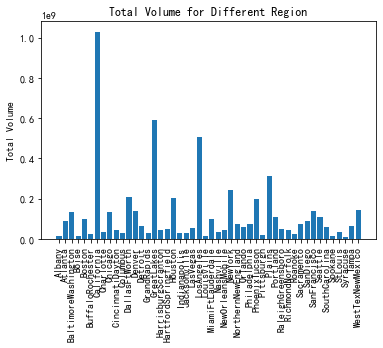

In [6]:
by_region_sum = data.groupby('region').agg('sum') 
by_region_sum.drop(['TotalUS','West','Midsouth','Northeast','Southeast','SouthCentral'],axis=0,inplace=True)
plt.bar(range(len(by_region_sum['Total Volume'])),by_region_sum["Total Volume"].values)
plt.xticks(range(len(by_region_sum['Total Volume'])), by_region_sum['Total Volume'].index, rotation=90)
plt.ylabel('Total Volume')
plt.title("Total Volume for Different Region")

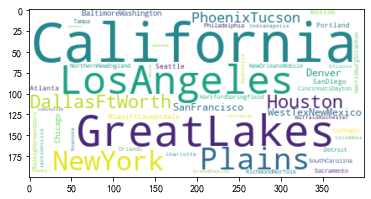

In [7]:
word_counts={}
wc = wordcloud.WordCloud(
    background_color='white',                   # 背景颜色
    max_font_size = 150                         # 最大字号
)
for i in range(len(by_region_sum["Total Volume"])):
    string=by_region_sum["Total Volume"].index[i]
    word_counts[string]=by_region_sum['Total Volume'][i]
    
wc.generate_from_frequencies(word_counts)                                        # 从字典生成词云
plt.imshow(wc, interpolation="bilinear")

Text(0.5, 1.0, 'Total Bags for diffenrent region')

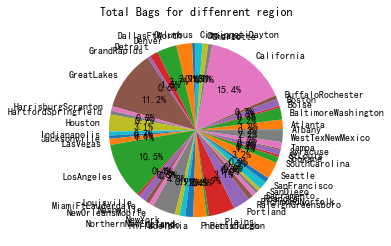

In [8]:
plt.pie(by_region_sum['Total Bags'], labels=by_region_sum["Total Bags"].index,autopct='%1.1f%%')
plt.title('Total Bags for diffenrent region')

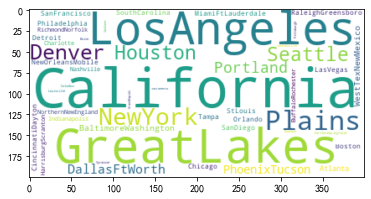

In [9]:
word_counts={}
wc = wordcloud.WordCloud(
    background_color='white',                   # 背景颜色
    max_font_size = 150                         # 最大字号
)
for i in range(len(by_region_sum["Total Bags"])):
    string=by_region_sum["Total Bags"].index[i]
    word_counts[string]=by_region_sum['Total Bags'][i]
    
wc.generate_from_frequencies(word_counts)                                        # 从字典生成词云
plt.imshow(wc, interpolation="bilinear")

Text(0.5, 1.0, 'AveragePrice for Different Region')

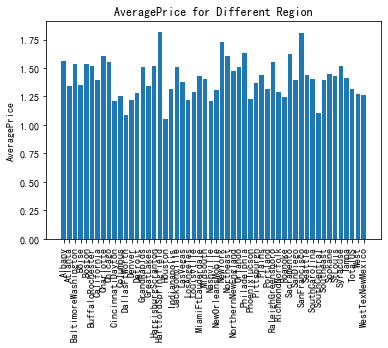

In [10]:
by_region_mean = data.groupby('region').agg('mean') 
plt.bar(range(len(by_region_mean['AveragePrice'])),by_region_mean["AveragePrice"].values)
plt.xticks(range(len(by_region_mean['AveragePrice'])), by_region_mean["AveragePrice"].index, rotation=90)
plt.ylabel('AveragePrice')
plt.title("AveragePrice for Different Region")

Text(0.5, 1.0, 'Total Bags for diffenrent type')

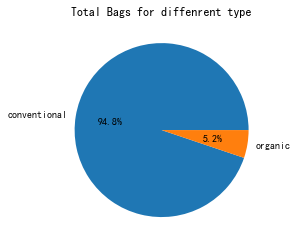

In [11]:
by_type_sum=data.groupby('type').agg('sum')
plt.pie(by_type_sum['Total Bags'], labels=by_type_sum["Total Bags"].index,autopct='%1.1f%%')
plt.title('Total Bags for diffenrent type')

Text(0.5, 1.0, 'average price for diffenrent type')

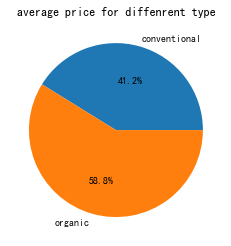

In [12]:
by_type_mean=data.groupby('type').agg('mean')
plt.pie(by_type_mean['AveragePrice'], labels=by_type_mean["AveragePrice"].index,autopct='%1.1f%%')
plt.title('average price for diffenrent type')

In [13]:
def normalization(x):
    _range = np.max(x) - np.min(x)
    return (x - np.min(x)) / _range

def standardization(x):
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    return (x - mu) / sigma##数据标准化  进行训练需要进行归一化

普通神经网络模型做价格预测。

In [14]:
input_size=1
hidden_size=5
output_size=1
neu=torch.nn.Sequential(
	torch.nn.Linear(input_size,hidden_size),
	torch.nn.Sigmoid(),
	torch.nn.Linear(hidden_size,output_size))

model=neu
print(model)#模型定义

Sequential(
  (0): Linear(in_features=1, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


In [15]:
cost=torch.nn.MSELoss()
optimizer=torch.optim.Adam(neu.parameters(),lr=0.001)#损失函数与优化器

In [16]:
by_date_mean = data.groupby('Date').agg('mean') 
by_date_mean["Date_num"]=""
for i in range(len(by_date_mean)):
    by_date_mean["Date_num"][i]=float(i)

X=by_date_mean["Date_num"].values

Y=by_date_mean["AveragePrice"].values

X=standardization(X)

#print(X)
#print(Y.tolist())

batch_size=20
losses=[]
for i in range(150): #5000就是训练次数epoch
    batch_loss=[]#记录每一批次的损失
    #每20个样本点被划分为一批次
    #start和end分别是提取一个batch数据的起始和终止下标
    for start in range(0, len(X), batch_size):
        end= start+batch_size if start+batch_size<len(X) else len(X)
        #xx=Variable(torch.FloatTensor(X[start:end]))#得到一个批次中的特征属性数据
        #yy=Variable(torch.FloatTensor(Y[start:end]))#得到一个批次中的目标属性数据
        xx=X[start:end].tolist()
        yy=Y[start:end].tolist()
        for j in range(len(xx)):
            x= Variable(torch.FloatTensor([xx[j]]))#得到一个批次中的特征属性数据
            y=Variable(torch.FloatTensor([yy[j]]))#得到一个批次中的特征属性数据
            predict= neu(x) #模型预测
            loss= cost(predict,y)#计算损失函数（均方误差）
            optimizer.zero_grad()#将优化器存储的那些参数的梯度设置为0
            loss.backward()#开始反向传播，计算所有梯度
            optimizer.step()#优化器开始运行一步 ，更新所有的参数
            batch_loss.append(loss.data.numpy())
    #每隔100步输出一下损失值（loss）
    if i%10==0:
        losses.append(np.mean(batch_loss))
        print(i,np.mean(batch_loss))
print(predict)
print(predict.data)

<ipython-input-16-439d6b634e05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  by_date_mean["Date_num"][i]=float(i)


0 0.86260456
10 0.022543777
20 0.023318375
30 0.023391698
40 0.0232655
50 0.023095245
60 0.022897711
70 0.022657335
80 0.022342656
90 0.021933554
100 0.021453567
110 0.020980641
120 0.020608172
130 0.020367235
140 0.020216843
tensor([1.5346], grad_fn=<AddBackward0>)
tensor([1.5346])


loss的可视化

Text(0, 0.5, 'Loss')

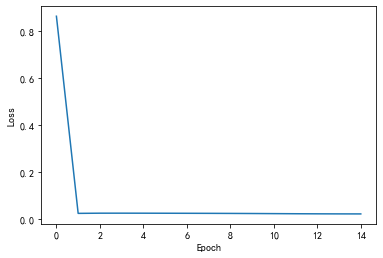

In [17]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')

C:\Users\63093\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\63093\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


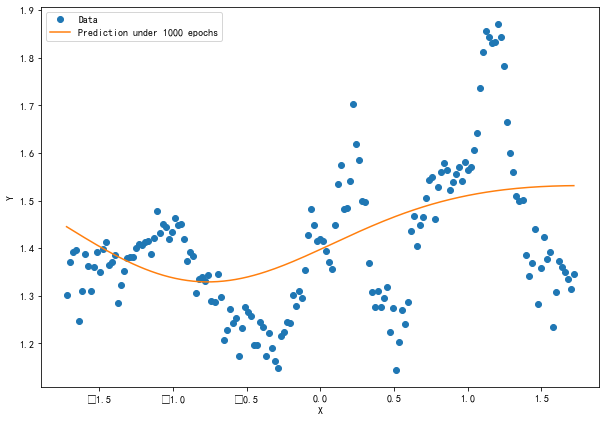

In [18]:
x_data = X.tolist()#得到一个批次中的特征属性数据
y_data=Y.tolist()#得到一个批次中的特征属性数据
prediction=[]
for i in range(len(x_data)):
    x= Variable(torch.FloatTensor([x_data[i]]))#得到一个批次中的特征属性数据
    prediction.append(neu(x).tolist()[0])
    #print(neu(x).tolist())

plt.figure(figsize = (10, 7))  #设定绘图窗口大小
xplot, = plt.plot(x_data, y_data, 'o')  #绘制原始数据
yplot, = plt.plot(x_data,prediction )  #绘制拟合数据
plt.xlabel('X')  #更改坐标轴标注
plt.ylabel('Y')  #更改坐标轴标注
plt.legend([xplot, yplot],['Data', 'Prediction under 1000 epochs'])  #绘制图例
plt.show()

In [19]:
from math import sqrt
mean_loss=0
loss=0
error=0
for i in range(len(prediction)):
    error=error+(prediction[i]-y_data[i])**2
    loss=loss+abs(prediction[i]-y_data[i])
mean_loss=loss/len(prediction)
mean_error=sqrt((error)/len(prediction))
print("loss:",mean_loss)
print("均方根误差:",mean_error)

loss: 0.10460471107120707
均方根误差: 0.13261921814673577


最简单的模型看起来效果不太好。

利用lstm模型解决时序预测问题

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader

In [21]:
class RNN(nn.Module):
    def __init__(self,input_size):
        super(RNN, self).__init__()
        self.rnn = nn.LSTM(
            input_size=input_size,
            hidden_size=5,
            num_layers=1,
            batch_first=True
        )
        self.out = nn.Sequential(
            nn.Linear(5, 1)
        )

    def forward(self, x):
        r_out, (h_n, h_c) = self.rnn(x, None)  # None 表示 hidden state 会用全0的 state
        out = self.out(r_out)
        return out
    
class TrainSet():
    def __init__(self, data,label):
        self.data =data
        self.label=label
        
    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return len(self.data)


In [22]:
n = 5
LR = 0.005
EPOCH = 250
train_end = -500

In [23]:
X2=[]
for i in range(len(X)-5):
    data_pas=[]
    for j in range(5):
        data_pas.append(Y[i+j])
    X2.append(data_pas)

X2=standardization(X2)
#print(X2[0],X2[1])
Y2=Y[5:]
print(Y2)
xx=Variable(torch.FloatTensor(X2))#得到一个批次中的特征属性数据
yy=Variable(torch.FloatTensor(Y2))#得到一个批次中的特征属性数据
trainset = TrainSet(xx,yy)
loader=DataLoader(trainset, batch_size=50,shuffle=False)

[1.31046296 1.38759259 1.36268519 1.31101852 1.36009259 1.39194444
 1.34925926 1.39759259 1.41296296 1.36398148 1.37166667 1.38518519
 1.28388889 1.32351852 1.35314815 1.38046296 1.38240741 1.38092593
 1.40046296 1.40842593 1.40648148 1.4137963  1.41564815 1.3875
 1.42083333 1.47731481 1.4312963  1.44981481 1.44453704 1.41944444
 1.43435185 1.46324074 1.44805556 1.45092593 1.41916667 1.37333333
 1.39231481 1.38305556 1.30490741 1.33435185 1.34       1.33092593
 1.34287037 1.28915888 1.28787037 1.34537037 1.29842593 1.20638889
 1.22768519 1.27166667 1.24222222 1.25296296 1.17388889 1.23231481
 1.27666667 1.26555556 1.25694444 1.19703704 1.19768519 1.24518519
 1.23537037 1.1737963  1.2212963  1.18962963 1.1637037  1.14851852
 1.21583333 1.22462963 1.24592593 1.24268519 1.30092593 1.27777778
 1.31083333 1.29472222 1.35324074 1.42805556 1.48231481 1.44833333
 1.41601852 1.41888889 1.41564815 1.39388889 1.37203704 1.35685185
 1.44814815 1.53444444 1.57527778 1.48296296 1.48444444 1.54074074

In [24]:
rnn = RNN(n)
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)  # optimize all cnn parameters
loss_func = nn.MSELoss()

for step in range(EPOCH):
    for x,y in loader:
        #print( torch.unsqueeze(xx[k], dim=0))
        output = rnn(torch.unsqueeze(x, dim=0))
        loss = loss_func(torch.squeeze(output), y)
        optimizer.zero_grad()  # clear gradients for this training step
        loss.backward()  # back propagation, compute gradients
        optimizer.step()
    if step % 10==0:
        print(step, loss)
        torch.save(rnn, 'rnn.pkl')
torch.save(rnn, 'rnn.pkl')

0 tensor(1.3697, grad_fn=<MseLossBackward>)
10 tensor(0.1946, grad_fn=<MseLossBackward>)
20 tensor(0.0616, grad_fn=<MseLossBackward>)
30 tensor(0.0471, grad_fn=<MseLossBackward>)
40 tensor(0.0389, grad_fn=<MseLossBackward>)
50 tensor(0.0328, grad_fn=<MseLossBackward>)
60 tensor(0.0280, grad_fn=<MseLossBackward>)
70 tensor(0.0243, grad_fn=<MseLossBackward>)
80 tensor(0.0213, grad_fn=<MseLossBackward>)
90 tensor(0.0188, grad_fn=<MseLossBackward>)
100 tensor(0.0168, grad_fn=<MseLossBackward>)
110 tensor(0.0150, grad_fn=<MseLossBackward>)
120 tensor(0.0135, grad_fn=<MseLossBackward>)
130 tensor(0.0122, grad_fn=<MseLossBackward>)
140 tensor(0.0111, grad_fn=<MseLossBackward>)
150 tensor(0.0101, grad_fn=<MseLossBackward>)
160 tensor(0.0093, grad_fn=<MseLossBackward>)
170 tensor(0.0085, grad_fn=<MseLossBackward>)
180 tensor(0.0078, grad_fn=<MseLossBackward>)
190 tensor(0.0072, grad_fn=<MseLossBackward>)
200 tensor(0.0067, grad_fn=<MseLossBackward>)
210 tensor(0.0062, grad_fn=<MseLossBackward>)

<ipython-input-25-c982813d0f41>:17: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000002077B539340>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([xplot, yplot],['Data', 'Prediction under 2000 epochs'])  #绘制图例
<ipython-input-25-c982813d0f41>:17: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x000002077B604100>] instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend([xplot, yplot],['Data', 'Prediction under 2000 epochs'])  #绘制图例
C:\Users\63093\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\63093\anaconda3\lib\site-packages\matplotlib\backends\backend

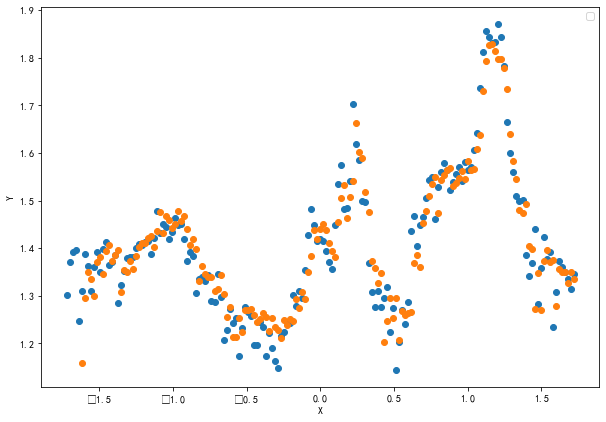

In [25]:

prediction=[]
    
for tx, ty in loader:
    #print(tx)
    output = rnn(torch.unsqueeze(tx, dim=0))
    for tmp in output.detach().numpy():
        for tmp1 in tmp:
            prediction.append(tmp1.tolist()[0])

#print(prediction)

plt.figure(figsize = (10, 7))  #设定绘图窗口大小
xplot = plt.plot(x_data, y_data, 'o')  #绘制原始数据
yplot = plt.plot(X[5:] ,prediction ,"o")  #绘制拟合数据
plt.xlabel('X')  #更改坐标轴标注
plt.ylabel('Y')  #更改坐标轴标注
plt.legend([xplot, yplot],['Data', 'Prediction under 2000 epochs'])  #绘制图例
plt.show()

In [26]:
from math import sqrt
mean_loss2=0
loss2=0
error2=0
for i in range(len(prediction)):
    error2=error2+(prediction[i]-y_data[i])**2
    loss2=loss2+abs(prediction[i]-y_data[i])
mean_loss2=loss2/len(prediction)
mean_error2=sqrt((error2)/len(prediction))
print("loss:",mean_loss2)
print("均方根误差:",mean_error2)

loss: 0.06939295766747094
均方根误差: 0.09420595500798451


总体效果来看，lstm的预测效果更加好，适合于时序相关的预测。

近几年鳄梨越来越受欢迎（真的很好吃），功效也非常好。我打算从 淘宝 来爬取鳄梨相关的文本，进行词云统计。

In [27]:
import os
import time
from selenium import webdriver
from selenium.webdriver.support.ui import Select

In [28]:
# 引入chromedriver.exe
driver = "C:/Users/63093/AppData/Local/Programs/Python/Python38/chromedriver.exe"
os.environ["webdriver.chrome.driver"] = driver
browser = webdriver.Chrome(driver)

# 设置为开发者模式
options = webdriver.ChromeOptions()
options.add_experimental_option('excludeSwitches', ['enable-automation'])

In [29]:
url = "https://uland.taobao.com/sem/tbsearch?refpid=mm_26632258_3504122_32538762&keyword=%E7%89%9B%E6%B2%B9%E6%9E%9C&clk1=fd2087599d506096d1794a1d03b51480&upsId=fd2087599d506096d1794a1d03b51480&spm=a2e0b.20350158.search.1&pid=mm_26632258_3504122_32538762&union_lens=recoveryid%3A201_11.170.87.38_17597780_1607230190059%3Bprepvid%3A201_11.170.87.38_17597780_1607230190059"
browser.get(url)
time.sleep(1)

In [30]:
txt=[]
def dataget():  # 获取前五页的物品词条数据
    for j in range(5):
        for i in range(60):
            txt.append(browser.find_element_by_xpath('//*[@id="mx_5"]/ul/li['+str(i+1)+']/a/div[1]').text)
        time.sleep(1)
        browser.find_element_by_xpath('//*[@id="J_pc-search-page-nav"]/span[3]').click()

dataget()

In [31]:
txt

['新货墨西哥进口牛油果12个大装新鲜水果包邮当季应季鳄梨顺丰包邮',
 '新货墨西哥进口牛油果大果新鲜水果批发包邮当季应季鳄梨如坏包赔',
 '墨西哥牛油果孕妇宝宝老人健身人员新鲜食用水果',
 '墨西哥牛油果包邮新鲜进口水果宝宝辅食鳄梨大果巨无霸avocado',
 '墨西哥牛油果进口鳄梨6个约2斤新鲜水果宝宝孕妇水果顺丰多省包邮',
 '绿银庄园 云南国产牛油果鳄梨油梨酪梨宝宝辅食孕妇应季水果整箱',
 '墨西哥进口牛油果新鲜水果宝宝辅食鳄梨avocado2//4/6/10个装',
 '【喵鲜生】进口牛油果大果新鲜水果鳄梨宝宝辅食avocado包邮',
 '【顺丰包邮】墨西哥进口鳄梨 牛油果孕宝辅食水果牛油果 6个',
 '墨西哥进口新鲜牛油果4大果6巨无霸8鳄梨10个装孕妇宝宝辅食水果',
 '非洲进口天然金黄未精致乳木果油脂500g护肤diy正品保湿唇膏原料',
 '冷冻芒果肉速冻台芒块 奶茶新鲜水果奶茶饮品水果冷冻芒果块',
 '【新年狂欢】ALBION奥碧虹澳尔滨焕白健康水乳保湿补水套装',
 '【新年狂欢】ALBION奥碧虹清新活润经典水乳套装澳尔滨水乳套装',
 '乐鲜果园进口牛油果新鲜鳄梨6个大果宝宝辅食新鲜水果现货顺丰',
 '百果园店智利进口牛油果 水果大果新鲜当季鳄梨宝宝辅即食avocado',
 '忆缘记糖水葡萄罐头850g 去皮去籽新鲜水果果肉奶茶店专用原材料',
 'Melvita蜜葳特牛油果眼部护理油50ML 进口保湿补水舒缓肌肤滋润',
 '心舒茶三高茶血压血糖血脂软化疏通血管的茶血管堵塞清道夫心脏茶',
 '萌天天小朋友MOMZOOM核桃油亚麻籽油五种坚果植物油辅食油100ml',
 '爷爷的农场法国牛油果油宝宝婴幼儿孕妇食用辅食热炒油婴儿辅食油',
 '自然之名酵母水爽肤水女湿敷补水保湿收缩毛孔神仙水控油化妆水',
 '王小二 墨西哥进口牛油果大果新鲜水果批发包邮当季应季鳄梨香甜',
 '【宝宝成长营养】墨西哥进口牛油果水果新鲜批发包邮4/8/10个鳄梨',
 '【幼犬口粮】法罗群岛三文鱼新鲜碎肉边角料无骨无刺500g真空包装',
 '牛油果水果鳄梨1枚大中果 新鲜水果西餐色拉',
 '墨西哥牛油果当季水果新鲜鳄梨5个巨无霸装孕妇宝宝辅食 顺丰包邮',
 '牛油果抱枕女生睡觉玩偶公仔超萌软Q弹大号ins毛绒玩具女孩布娃娃',


In [32]:
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud

In [33]:
word_list=''
for text in txt:
    seq_list=jieba.cut(text,cut_all=False)
    #print(list(seq_list))
    for i in seq_list:
        if i=='【' or i=='】' or ('0'<=i and i<='9'):#清理无用的数据
            continue
        word_list=word_list+i+' '
word_list


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\63093\AppData\Local\Temp\jieba.cache
Loading model cost 0.962 seconds.
Prefix dict has been built succesfully.


"新货 墨西哥 进口 牛油果 个大装 新鲜 水果 包邮当季 应季 鳄梨 顺丰 包邮 新货 墨西哥 进口 牛油果 大果 新鲜 水果 批发 包邮当季 应季 鳄梨 如坏 包赔 墨西哥 牛油果 孕妇 宝宝 老人 健身 人员 新鲜 食用 水果 墨西哥 牛油果 包邮 新鲜 进口 水果 宝宝 辅食 鳄梨 大果 巨无霸 avocado 墨西哥 牛油果 进口 鳄梨 个 约 斤 新鲜 水果 宝宝 孕妇 水果 顺丰多省 包邮 绿银 庄园   云南 国产 牛油果 鳄梨 油梨 酪 梨 宝宝 辅食 孕妇 应季 水果 整箱 墨西哥 进口 牛油果 新鲜 水果 宝宝 辅食 鳄梨 avocado2 / / / / 个装 喵 鲜生 进口 牛油果 大果 新鲜 水果 鳄梨 宝宝 辅食 avocado 包邮 顺丰 包邮 墨西哥 进口 鳄梨   牛油果 孕宝 辅食 水果 牛油果   个 墨西哥 进口 新鲜 牛油果 大果 巨无霸 鳄梨 个装 孕妇 宝宝 辅食 水果 非洲 进口 天然 金黄 未 精致 乳木果 油脂 护肤 diy 正品 保湿 唇膏 原料 冷冻 芒果 肉 速冻 台芒 块   奶茶 新鲜 水果 奶茶 饮品 水果 冷冻 芒果 块 新年 狂欢 ALBION 奥碧虹 澳尔滨 焕白 健康 水乳 保湿 补水 套装 新年 狂欢 ALBION 奥碧虹 清新 活润 经典 水乳 套装 澳尔滨 水乳 套装 乐鲜 果园 进口 牛油果 新鲜 鳄梨 个大果 宝宝 辅食 新鲜 水果 现货 顺丰 百 果园 店 智利 进口 牛油果   水果 大果 新鲜 当季 鳄梨 宝宝 辅 即食 avocado 忆缘记 糖水 葡萄 罐头   去皮 去 籽 新鲜 水果 果肉 奶茶 店 专用 原材料 Melvita 蜜葳特 牛油果 眼部 护理 油   进口 保湿 补水 舒缓 肌肤 滋润 心舒茶 三高 茶 血压 血糖 血脂 软化 疏通 血管 的 茶 血管 堵塞 清道夫 心脏 茶 萌 天天 小朋友 MOMZOOM 核桃油 亚麻 籽油 五种 坚果 植物油 辅 食油 爷爷 的 农场 法国 牛油果 油 宝宝 婴幼儿 孕妇 食用 辅食 热炒 油 婴儿 辅 食油 自然 之名 酵母 水 爽肤水 女湿 敷 补水 保湿 收缩 毛孔 神仙 水 控油 化妆水 王小二   墨西哥 进口 牛油果 大果 新鲜 水果 批发 包邮当季 应季 鳄梨 香甜 宝宝 成长 营养 墨西哥 进口 牛油

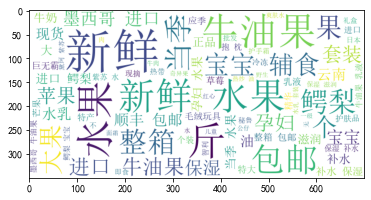

In [34]:
wc = WordCloud(
        # 设置字体，不指定就会出现乱码
        font_path=r'C:\Users\63093\Desktop\simsun.ttc',
        # 设置背景色
        background_color='white',
        # 设置背景宽
        width=700,
        # 设置背景高
        height=350,
        # 最大字体
        max_font_size=100,
        # 最小字体
        min_font_size=10,
        mode='RGBA'
        #colormap='pink'
        )
# 产生词云
wc.generate(word_list)

plt.figure("淘宝中搜索牛油果后的结果相关词云统计")
plt.imshow(wc)



可见，在淘宝的推荐中，搜索牛油果，出来的相关关键词当然是水果，其次用户非常关心的“新鲜”“包邮”等，也会在标题中体现。